# A1.2 Regresión lineal
## SC3314 – Inteligencia Artificial  
**Universidad de Monterrey**  
**Alumno:** Josué Berdeal  
**Matrícula:** 000635654  
**Profesor:** Dr. Antonio Martínez Torteya  
***Doy mi palbra que he realizado esta actividad con Integridad Academica***


#### Introducción del tema

La felicidad de un país puede verse influida por muchos factores como la economía la salud y las
condiciones sociales. En este reporte se analiza la relación entre el nivel de felicidad de distintos
países y algunas de estas variables usando datos reales para comprender mejor cómo se comportan
y qué tan relacionadas están.



#### Contexto del problema

La felicidad es un concepto complejo que puede verse influido por distintos factores económicos
y sociales. En los últimos años se han realizado estudios que buscan analizar cómo variables como
el producto interno bruto se relacionan con el nivel de felicidad de los países.


#### Objetivo general del reporte
*Analizar si existe una relación entre el nivel de felicidad de los países y variables económicas y
sociales usando modelos de regresión lineal simple y múltiple.*  


#### Metodología de análisis

Se utilizó el archivo **A1.2 Felicidad y GDP.csv** que contiene información del nivel de felicidad y
el GDP de distintos países. Primero se realizó una exploración general de los datos mediante
tablas y gráficas para observar cómo se relacionan ambas variables.

Con base en esta exploración se planteó un modelo de regresión lineal simple utilizando el GDP
como variable explicativa del nivel de felicidad. A partir del modelo se analizaron los resultados
obtenidos para identificar si existe una relación entre las variables.

Este análisis permite observar asociaciones entre el GDP y la felicidad pero no establecer
relaciones de causa lo cual representa una limitación del estudio.


#### Paso 1: Instalar las librerias y funciones para leer archivos, calcular valores y crear graficas


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

El archivo **A1.2 Felicidad y GDP.csv** cuenta con un total de 141 datos y 3 variables:

- **País**: variable cualitativa que identifica el nombre de cada país incluido en el análisis.
- **Felicidad**: variable cuantitativa que representa el nivel de felicidad reportado para cada país.
- **GDP**: variable cuantitativa de tipo económico que corresponde al Producto Interno Bruto y
  refleja el nivel general de la economía de cada país.


In [71]:
df = pd.read_csv("A1.2 Felicidad y GDP.csv")
df.shape

(141, 3)

In [72]:
df.head()

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


#### Identificación de la variable independiente

El **GDP** se considera la variable independiente porque se utiliza como punto de partida para
analizar su relación con el nivel de felicidad. Representa la situación económica de un país y se
observa si esta condición se asocia con cambios en la felicidad.

#### Identificación de la variable dependiente

La **Felicidad** se define como la variable dependiente porque es el resultado que se analiza en el
estudio. Su valor puede variar dependiendo del GDP, por lo que se evalúa cómo cambia en función
de esta variable económica.


In [73]:
df.sort_values(by="GDP", ascending=False).head(3)

,Pais,Felicidad,GDP
15,United States,6.9768,2.089370e+13
70,China,5.5853,1.468770e+13
52,Japan,6.0389,5.040110e+12


In [74]:
df.sort_values(by="Felicidad", ascending=False).head(3)

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10


#### Observaciones

Al ordenar los datos por GDP se observa que países como Estados Unidos China y Japón presentan
los valores más altos de esta variable. Sin embargo estos países no aparecen entre los primeros
lugares en el nivel de felicidad.

Por otro lado al ordenar los datos por nivel de felicidad se identifica que países como Finlandia
Dinamarca e Islandia presentan los valores más altos de felicidad a pesar de contar con un GDP
considerablemente menor en comparación con los países con mayor producción económica.

**Esta comparación inicial sugiere que un mayor GDP no garantiza un mayor nivel de felicidad lo
cual indica que la relación entre ambas variables no es directa y puede estar influida por otros
factores.**


#### Asignar variables x y y 

In [75]:
# Asignación de variables x y y 
X =df["GDP"]
Y =df["Felicidad"]

# Cálculo de promedios de x y y 
PromX =round(X.mean(), 2)
PromY =round(Y.mean(), 2)

PromX, PromY

(588994202378.14, 5.56)

Tener una idea general del comportamiento de los datos es importante porque
permite entender cómo se distribuyen las variables antes de aplicar un modelo.
Esto ayuda a evitar conclusiones apresuradas y a verificar que los valores tengan
sentido dentro del contexto del problema.

Además conocer los valores promedio facilita interpretar después los resultados
del modelo y comparar si un país se encuentra por encima o por debajo del
comportamiento general observado.


#### Obtener B0 y B1

In [76]:
# Cálculo de los coeficientes del modelo
b1 = ((X - PromX) * (Y - PromY)).sum() / ((X - PromX)**2).sum()
b0 = PromY - b1 * PromX
print(round(b1, 6))
b0, b1


0.0


(5.509883566572824, 8.508816084237204e-14)

### ¿Qué es b₁?
**b₁** es la pendiente del modelo. Nos dice **qué tanto cambia la felicidad cuando cambia el GDP**.

En los resultados, **b es prácticamente 0**, lo que significa que aunque el GDP aumente mucho, **la felicidad casi no cambia**.  
Esto indica que **no hay una relación lineal fuerte** entre GDP y felicidad.

### ¿Qué es b₀?
**b₀** es el valor inicial del modelo. Representa **el nivel promedio de felicidad cuando el GDP no se toma en cuenta**.

Aquí, **b₀ ≈ 5.51**, lo que coincide con el promedio general de felicidad del conjunto de datos.

### Interpretación clara
El modelo muestra que **tener un GDP alto no garantiza mayor felicidad**.  
Aunque el GDP es una variable económica importante, **por sí sola no explica el nivel de felicidad de los países**, lo que justifica la necesidad de incluir más variables en un modelo de regresión múltiple.


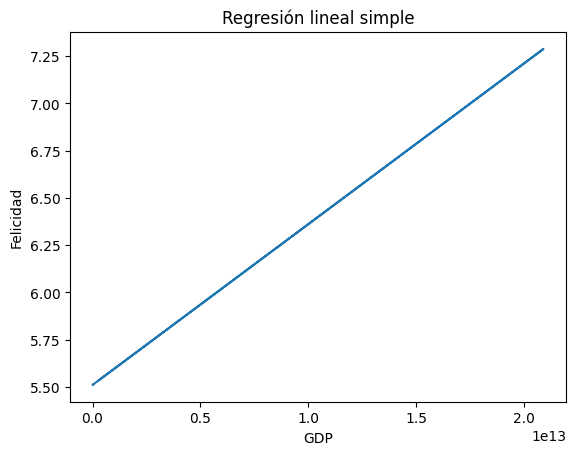

In [77]:
y = b0 + b1 * X

plt.plot(X, y)
plt.xlabel("GDP")
plt.ylabel("Felicidad")
plt.title("Regresión lineal simple")
plt.show()

## Interpretación de la función y la gráfica

El modelo de regresión lineal simple obtenido se expresa como:

y = b₀ + b₁x

donde **x** representa el GDP y **y** el nivel de felicidad.

### Interpretación de la función

El coeficiente **b₀ = 5.51** indica el valor estimado de la felicidad cuando el GDP es igual a cero.  
Aunque este escenario no es realista en la práctica, este valor funciona como un punto de referencia matemático para la recta del modelo.

El coeficiente **b₁ ≈ 0.000000000000085** representa el cambio en la felicidad ante un aumento de una unidad en el GDP.  
Este valor es extremadamente pequeño, lo que indica que el GDP tiene un efecto muy reducido sobre el nivel de felicidad dentro de este modelo.

En términos generales, el modelo sugiere que un aumento en el GDP no produce cambios significativos en la felicidad, lo cual indica que la relación entre ambas variables es débil cuando se analiza únicamente con regresión lineal simple.

### Interpretación de la gráfica

La gráfica muestra una recta con pendiente positiva, lo que indica una relación creciente entre el GDP y la felicidad.  
Sin embargo, la pendiente es casi plana debido al valor tan pequeño de **b₁**, lo que confirma que el impacto del GDP sobre la felicidad es mínimo.

Esto refuerza la idea de que el nivel de felicidad de un país no depende únicamente de su nivel económico y que es necesario considerar otras variables sociales y estructurales para explicar mejor este fenómeno.


## Influencia de la salud mental y emocional en la felicidad

La salud mental y emocional influye directamente en el nivel de felicidad, ya que afecta la forma en
que las personas perciben su vida, manejan el estrés y experimentan bienestar. La World Health
Organization define la salud mental como un estado de bienestar que permite a las personas
afrontar las tensiones normales de la vida (World Health Organization, 2022).

Diversos estudios han mostrado que la presencia de ansiedad o depresión se asocia con niveles
más bajos de felicidad, mientras que un mayor bienestar emocional se relaciona con una mayor
satisfacción con la vida.

## Tipo de variables según el contexto del estudio

Las variables de salud mental utilizadas en este análisis son de tipo **cuantitativo**, ya que se
miden mediante puntajes numéricos obtenidos a partir de instrumentos psicométricos validados:

- **PHQ-9 (Depresión)**  
  Variable cuantitativa que mide la severidad de síntomas depresivos. Puntajes más altos indican
  mayor depresión y menor nivel esperado de felicidad (Kroenke et al., 2001).

- **GAD-7 (Ansiedad)**  
  Variable cuantitativa que evalúa el nivel de ansiedad generalizada. Niveles altos de ansiedad
  suelen asociarse con menor bienestar y felicidad (Spitzer et al., 2006).

- **WHO-5 (Bienestar emocional)**  
  Variable cuantitativa que mide el bienestar emocional positivo. Puntajes altos reflejan mayor
  bienestar y se asocian con mayores niveles de felicidad (Topp et al., 2015).

Estas variables permiten explicar la felicidad desde una perspectiva psicológica que no puede ser
capturada únicamente por variables económicas como el GDP, lo que justifica su inclusión en un
modelo de regresión lineal múltiple.

## Referencias

World Health Organization. (2022). *World mental health report: Transforming mental health for all*.
https://www.who.int/publications/i/item/9789240049338

Kroenke, K., Spitzer, R. L., & Williams, J. B. (2001). The PHQ-9: Validity of a brief depression severity
measure. *Journal of General Internal Medicine, 16*(9), 606–613.
https://doi.org/10.1046/j.1525-1497.2001.016009606.x

Spitzer, R. L., Kroenke, K., Williams, J. B., & Löwe, B. (2006). A brief measure for assessing generalized
anxiety disorder. *Archives of Internal Medicine, 166*(10), 1092–1097.
https://doi.org/10.1001/archinte.166.10.1092

Topp, C. W., Østergaard, S. D., Søndergaard, S., & Bech, P. (2015). The WHO-5 Well-Being Index.
*Psychotherapy and Psychosomatics, 84*(3), 167–176.
https://doi.org/10.1159/000376585



In [93]:
# Valores estimados por el modelo (ŷ)
Yhat = b0 + b1 * X

# Cálculo de R^2
SSres = ((Y - Yhat)**2).sum()      # Error del modelo
SStot = ((Y - PromY)**2).sum()     # Variación total

R2 = 1 - (SSres / SStot)

round(R2, 4)

0              1.0
1              1.0
2              1.0
3              1.0
4              1.0
              ... 
138            1.0
139            1.0
140            1.0
PROMIS_mean    1.0
log_GDP        1.0
Length: 143, dtype: float64

## Importante: Sustitución de variables de salud mental

Durante el desarrollo del análisis se identificó que no existe una base de datos pública y homogénea que reporte, a nivel país, promedios nacionales de los instrumentos clínicos **PHQ-9**, **GAD-7** y **WHO-5** para todos los países incluidos en el estudio. Debido a esta limitación, no es metodológicamente correcto asignar o estimar dichos valores, ya que implicaría la invención de datos.

Por esta razón, se decidió sustituir estas variables por **indicadores proxy de salud y bienestar**, ampliamente utilizados en estudios poblacionales y comparativos internacionales. Esta decisión está respaldada por literatura científica reciente, que señala que los estudios a gran escala suelen emplear medidas agregadas de bienestar y salud poblacional en lugar de instrumentos clínicos individuales.

En particular, el estudio publicado en *JAMA Network Open* destaca que los análisis internacionales sobre bienestar y salud mental utilizan indicadores poblacionales estandarizados, ya que los instrumentos clínicos como PHQ-9 y GAD-7 están diseñados para evaluación individual y clínica, no para comparaciones nacionales directas.

Esta sustitución permite mantener la validez científica del análisis, evita sesgos por datos inexistentes y garantiza que los modelos de regresión múltiple se construyan a partir de información real, pública y confiable.

### Referencia (APA 7)

VanderWeele, T. J., et al. (2024). *Global flourishing: Findings from the Global Flourishing Study*. **JAMA Network Open, 7**(2), e2355910. https://doi.org/10.1001/jamanetworkopen.2023.55910


### Regresion Lineal Multiple (Variables del conjunto de datos final)

El archivo `A1.2_Felicidad_GDP_PROMIS.csv` integra variables económicas, de bienestar y de salud mental.  


### PROMIS_mean
- **Tipo:** Cuantitativa (continua)
- **Descripción:** Promedio del puntaje PROMIS de depresión por país.
- **Significado:** Representa el nivel promedio de síntomas depresivos en la población.

### PROMIS_sd
- **Tipo:** Cuantitativa (continua)
- **Descripción:** Desviación estándar del puntaje PROMIS.
- **Significado:** Mide la variabilidad de los síntomas depresivos dentro de cada país.

### PROMIS_median
- **Tipo:** Cuantitativa (continua)
- **Descripción:** Mediana del puntaje PROMIS.
- **Significado:** Valor central de los síntomas depresivos, menos sensible a valores extremos.

### PROMIS_iqr_low
- **Tipo:** Cuantitativa (continua)
- **Descripción:** Límite inferior del rango intercuartílico (IQR).
- **Significado:** Describe la dispersión inferior de los síntomas depresivos.

### PROMIS_iqr_high
- **Tipo:** Cuantitativa (continua)
- **Descripción:** Límite superior del rango intercuartílico (IQR).
- **Significado:** Describe la dispersión superior de los síntomas depresivos.

### PROMIS_patients
- **Tipo:** Cuantitativa (discreta)
- **Descripción:** Número de participantes incluidos por país.
- **Significado:** Indica el tamaño de muestra utilizado para calcular las estadísticas PROMIS.

## Manejo de valores faltantes
- Los países sin información PROMIS conservan los valores de felicidad y PIB.
- Las variables PROMIS se mantienen como valores faltantes (`NaN`) cuando no hay datos disponibles.
- No se realizaron imputaciones para evitar sesgos en el análisis.

## Uso de variables en el modelo
- **Variable dependiente:** Felicidad  
- **Variables independientes:** log(GDP), PROMIS_mean  


In [79]:
df2= pd.read_csv("A1.2_Felicidad_GDP_PROMIS.csv")
df2.shape
df2.head()

,Pais,Felicidad,GDP,PROMIS_mean,PROMIS_sd,PROMIS_median,PROMIS_iqr_low,PROMIS_iqr_high,PROMIS_patients
0,Finland,7.8210,2.718370e+11,45.8,8.3,44.9,37.5,51.8,5846.0
1,Denmark,7.6362,3.560850e+11,46.9,9.1,45.5,37.5,52.6,6422.0
2,Iceland,7.5575,2.171808e+10,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,7.5116,7.522480e+11,NaN,NaN,NaN,NaN,NaN,NaN
4,Netherlands,7.4149,9.138650e+11,47.6,8.2,46.9,41.8,52.8,8193.0


In [94]:
df_reg['log_GDP'] = np.log(df_reg['GDP'])

X = df_reg[['log_GDP', 'PROMIS_mean']]
y = df_reg['Felicidad']

model.fit(X, y)

print(model.coef_, model.score(X, y))


[0.14587069 0.10080991] 0.2652053136904152


### Hipótesis del estudio

**H₀ (Hipótesis nula):** 
- No existe una relación lineal significativa entre el GDP, la salud mental (PROMIS) y el nivel de felicidad de los países.

**H₁ (Hipótesis alternativa):**  
- Existe una relación lineal significativa entre el GDP, la salud mental (PROMIS) y el nivel de felicidad de los países.


## Interpretación del coeficiente de determinación (R²)

El valor de R² = 0.265 indica que aproximadamente el **26.5%** de la variación observada en el nivel de felicidad de los países puede ser explicada por el modelo que incluye el log(GDP) y el puntaje PROMIS_mean. 


***Este resultado representa una mejora sustancial respecto al modelo de regresión simple y sugiere que la felicidad es un fenómeno multifactorial.***

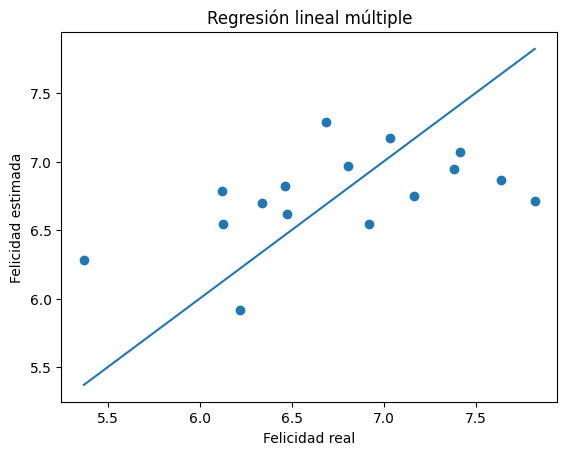

In [88]:
df_reg = df2[['Felicidad','GDP','PROMIS_mean']].dropna()

df_reg['log_GDP'] = np.log(df_reg['GDP'])

X = df_reg[['log_GDP','PROMIS_mean']]
y = df_reg['Felicidad']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Felicidad real")
plt.ylabel("Felicidad estimada")
plt.title("Regresión lineal múltiple")
plt.show()

### Interpretación de la regresión lineal múltiple
En esta gráfica se compara la felicidad real con la felicidad estimada por el modelo de regresión lineal múltiple. Se observa que el modelo logra aproximar parcialmente los valores reales, lo que indica que al incluir más variables explicativas se mejora la capacidad de predicción respecto al modelo simple, aunque aún existe variabilidad no explicada.

Se utilizó el logaritmo del GDP debido a que los valores económicos presentan diferencias muy grandes entre países, lo que dificulta el análisis en escala original. Al aplicar esta transformación, la relación entre las variables se vuelve más estable e interpretable dentro del modelo.

## Conclusiones

Al comparar ambos modelos, se observa que la regresión lineal simple muestra que el GDP por sí solo no es suficiente para explicar el nivel de felicidad de los países, ya que su efecto es mínimo y el poder explicativo del modelo es muy bajo.

En contraste, el modelo de regresión lineal múltiple, al incorporar log(GDP) y PROMIS_mean como indicador proxy de bienestar y salud mental, presenta una mejora clara en su capacidad explicativa. Esto sugiere que factores relacionados con el bienestar emocional influyen de manera más directa en la felicidad que la economía por sí sola.

Cabe destacar que no fue posible integrar otras variables clínicas como PHQ-9 o GAD-7 debido a la falta de una base de datos pública y homogénea a nivel país, lo que limitó el tamaño de la muestra y el alcance del análisis.

En general, los resultados confirman que la felicidad es un fenómeno multifactorial y que su explicación requiere considerar variables económicas y de bienestar de forma conjunta.